Librairies

In [1]:
# importing librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import missingno as msno
import json
import urllib
import requests
plt.style.use('fivethirtyeight')

In [2]:
!pip install -q mplleaflet

In [3]:
import mplleaflet

# Loading data

In [4]:
# loading cleaned dataset
data = pd.read_csv("/content/drive/My Drive/DATASETS/ML/P3/data.csv")

In [5]:
# Converting some data types
data["councildistrictcode"] = data["councildistrictcode"].astype("category")
data["numberofbuildings"] = data["numberofbuildings"].astype("int")
data["yearbuilt"] = data["yearbuilt"].astype("int")

# Central tendencies

In [6]:
col = ['yearbuilt', 'numberofbuildings',
       'numberoffloors', 'propertygfatotal']
data[col].describe()

,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal
count,746.000000,746.000000,746.000000,7.460000e+02
mean,1963.733244,1.057641,6.080429,1.788734e+05
std,33.207784,0.497674,8.398879,2.419935e+05
min,1900.000000,1.000000,1.000000,2.002800e+04
25%,1930.000000,1.000000,2.000000,5.848300e+04
50%,1969.000000,1.000000,4.000000,9.842250e+04
75%,1994.000000,1.000000,6.000000,1.907350e+05
max,2012.000000,7.000000,76.000000,1.952220e+06


## Corr matrix

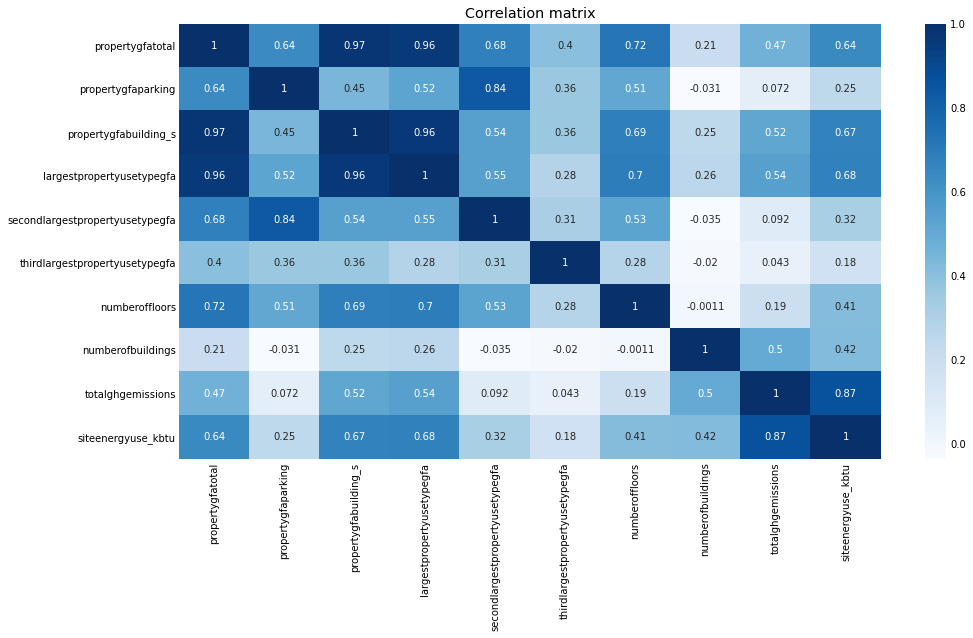

In [7]:
# correlation matrix

col = ['propertygfatotal', 'propertygfaparking','propertygfabuilding_s',
       'largestpropertyusetypegfa',
       'secondlargestpropertyusetypegfa',
       'thirdlargestpropertyusetypegfa','numberoffloors','numberofbuildings',
       'totalghgemissions', 'siteenergyuse_kbtu']
corr_matrix=data[col].corr()

plt.figure(figsize=(14,8))
sns.heatmap(corr_matrix,annot=True,cmap="Blues")
plt.title("Correlation matrix")
plt.show()

# councildistrictcode

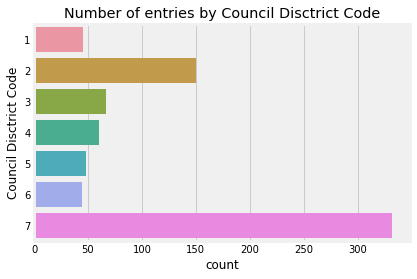

In [8]:
sns.countplot(y=data["councildistrictcode"],data=data)
plt.title("Number of entries by Council Disctrict Code")
plt.ylabel("Council Disctrict Code")
plt.show()

<Figure size 1008x576 with 0 Axes>

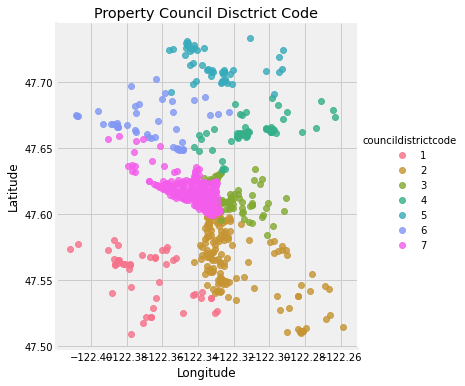

In [9]:
plt.figure(figsize=(14,8))
sns.lmplot(x="longitude", y = "latitude", hue = "councildistrictcode", data=data, fit_reg=False)
plt.title("Property Council Disctrict Code")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# buildingtype

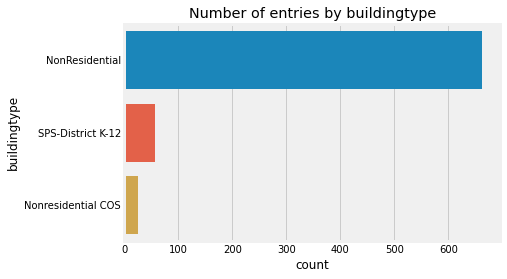

In [10]:
sns.countplot(y=data["buildingtype"],data=data,
              order = data["buildingtype"].value_counts().index)
plt.title("Number of entries by buildingtype")
plt.ylabel("buildingtype")
plt.show()

# Primary activity

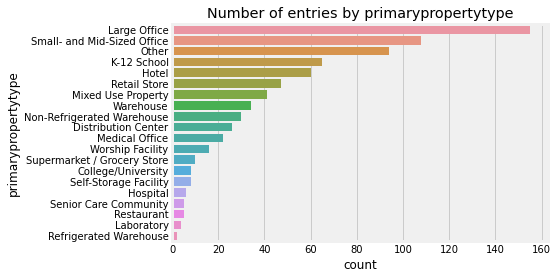

In [11]:
sns.countplot(y=data["primarypropertytype"],data=data,
              order = data["primarypropertytype"].value_counts().index)
plt.title("Number of entries by primarypropertytype")
plt.ylabel("primarypropertytype")
plt.show()

<Figure size 1008x576 with 0 Axes>

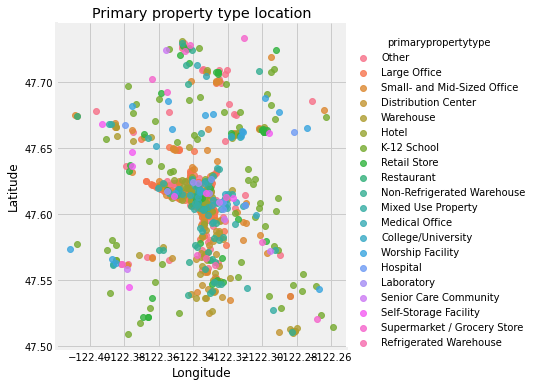

In [12]:
plt.figure(figsize=(14,8))
sns.lmplot(x="longitude", y = "latitude", hue = "primarypropertytype", data=data, fit_reg=False)
plt.title("Primary property type location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

# Year Built

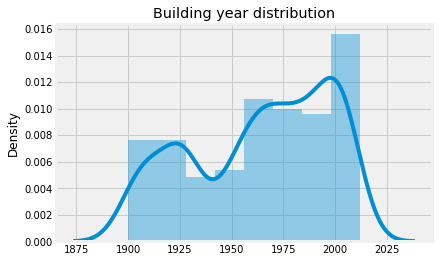

In [13]:
sns.distplot(x=data["yearbuilt"])
plt.title("Building year distribution")

plt.show()

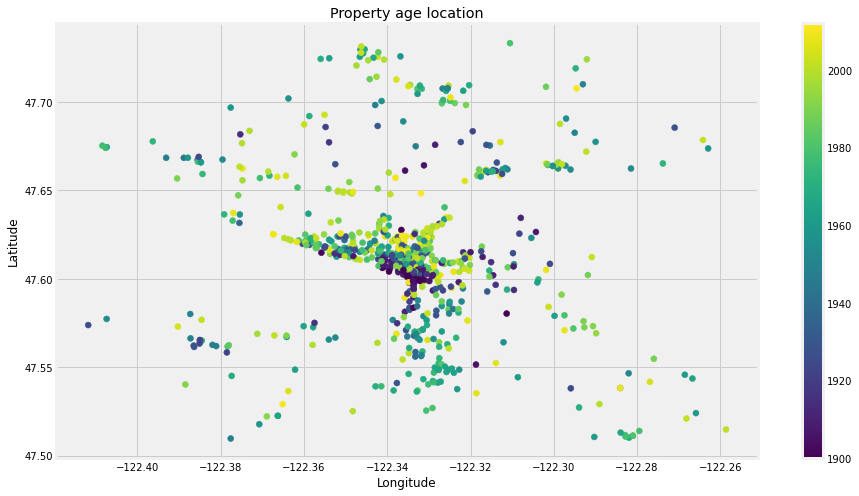

In [14]:
plt.figure(figsize=(14,8))
plt.scatter(x=data["longitude"], y = data["latitude"], c = data["yearbuilt"])
plt.title("Property age location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar()
plt.show()

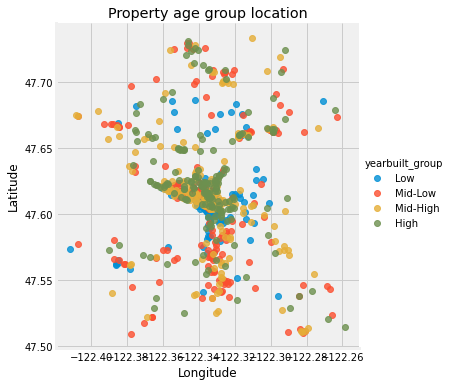

In [15]:
bin_labels_4 = ['Low', 'Mid-Low', 'Mid-High', 'High']
data["yearbuilt_group"] = pd.qcut(data["yearbuilt"],
                              q=4,
                              labels=bin_labels_4)

sns.lmplot(x="longitude", y = "latitude", hue = "yearbuilt_group", data=data, fit_reg=False)
plt.title("Property age group location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

In [16]:
data.groupby("councildistrictcode")["yearbuilt"].median()

councildistrictcode
1    1966.0
2    1965.5
3    1985.0
4    1971.5
5    1979.0
6    1973.0
7    1969.0
Name: yearbuilt, dtype: float64

<Figure size 1008x576 with 0 Axes>

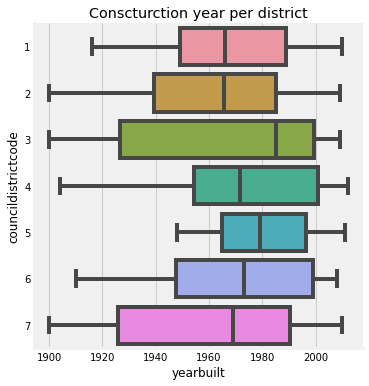

In [17]:
plt.figure(figsize=(14,8))
sns.catplot(x="yearbuilt",y="councildistrictcode",data=data,kind="box")
plt.title("Conscturction year per district")
plt.show()

# Nb of building

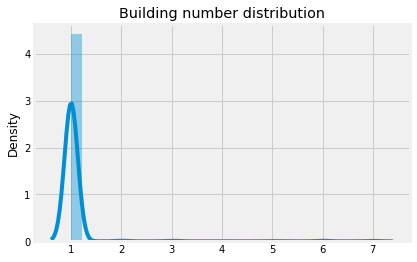

In [18]:
sns.distplot(x=data["numberofbuildings"])
plt.title("Building number distribution")
plt.show()

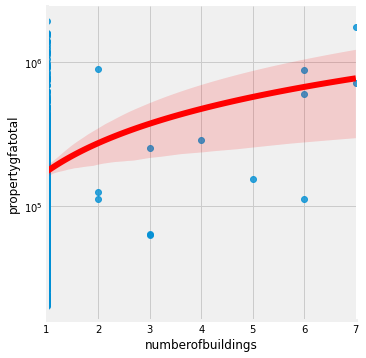

In [19]:
sns.lmplot(y='propertygfatotal', x ='numberofbuildings', data=data,line_kws = {"color": "red"})
plt.yscale("log")
plt.show()

In [20]:
r = np.corrcoef(data.propertygfatotal, data.numberofbuildings)
print(r[1,0])

0.2061513573405588


In [21]:
len(data[data["numberofbuildings"] !=1])

13

In [22]:
data[data["numberofbuildings"] !=1]

,seattlebuildingid,datayear,buildingtype,primarypropertytype,propertyname,councildistrictcode,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,propertygfaparking,propertygfabuilding_s,latitude,longitude,outlier,largestpropertyusetype,largestpropertyusetypegfa,secondlargestpropertyusetype,secondlargestpropertyusetypegfa,thirdlargestpropertyusetype,thirdlargestpropertyusetypegfa,totalghgemissions,siteenergyuse_kbtu,energystarscore,yearbuilt_group
72,198,2016,NonResidential,Hospital,Seattle Children's Hospital Main Campus,4,1953,6,10,879000.0,0.0,879000.0,47.662310,-122.281460,No,Hospital (General Medical & Surgical),879000.0,NaN,0.0,NaN,0.0,8145.52,253832464.0,10.0,Mid-Low
109,657,2016,NonResidential,Mixed Use Property,2200 Westlake - SEDO,7,2006,2,11,901603.0,385196.0,516407.0,47.617830,-122.337290,No,Parking,385196.0,Multifamily Housing,340236.0,Hotel,67627.0,734.72,39403320.0,31.0,High
235,268,2016,NonResidential,Hospital,Swedish Cherry Hill,3,1990,6,5,597519.0,0.0,597519.0,47.607050,-122.309660,No,Hospital (General Medical & Surgical),601615.0,Parking,0.0,NaN,0.0,4906.33,143423024.0,34.0,Mid-High
288,187,2016,NonResidential,Other,Youth Services Center,3,1971,3,6,250981.0,0.0,250981.0,47.604620,-122.315490,No,Other,137565.0,Courthouse,78357.0,NaN,0.0,422.39,13071700.0,NaN,Mid-High
305,829,2016,NonResidential,Other,Northwest Work Lofts,7,1928,3,4,62600.0,0.0,62600.0,47.619150,-122.358710,No,Other,215197.0,NaN,0.0,NaN,0.0,406.04,11147342.0,NaN,Low
374,46,2015,NonResidential,Distribution Center,SEATTLE WAREHOUSE OFFICE BUILDING,2,1961,7,2,714095.0,0.0,714095.0,47.510603,-122.290276,No,Distribution Center,714095.0,NaN,0.0,NaN,0.0,333.54,47843892.0,1.0,Mid-Low
437,608,2016,NonResidential,Large Office,411 1ST AVE S (ID608),2,1913,5,7,154159.0,0.0,154159.0,47.598780,-122.334580,low outlier,Office,193154.0,NaN,0.0,NaN,0.0,29.43,11195917.0,100.0,Low
518,516,2016,NonResidential,Other,Aurora Shopping Center,5,1964,6,1,111900.0,0.0,111900.0,47.725460,-122.346590,No,Strip Mall,124231.0,Parking,0.0,NaN,0.0,226.43,9814820.0,NaN,Mid-Low
567,147,2016,NonResidential,Hospital,Swedish Ballard,6,1954,4,5,285333.0,0.0,285333.0,47.667370,-122.379560,No,Hospital (General Medical & Surgical),302661.0,Parking,0.0,NaN,0.0,1990.50,68090728.0,14.0,Mid-Low
620,730,2016,NonResidential,Other,(ID#730)Campus 4:KC Metro Transit Ryerson Base,2,1986,3,2,63644.0,0.0,63644.0,47.590800,-122.328280,No,Other - Public Services,65700.0,Parking,0.0,NaN,0.0,168.50,6858533.5,NaN,Mid-High


In [23]:
len(data[data["numberofbuildings"] > 2])

10

In [24]:
data[data["numberofbuildings"] > 3]

,seattlebuildingid,datayear,buildingtype,primarypropertytype,propertyname,councildistrictcode,yearbuilt,numberofbuildings,numberoffloors,propertygfatotal,propertygfaparking,propertygfabuilding_s,latitude,longitude,outlier,largestpropertyusetype,largestpropertyusetypegfa,secondlargestpropertyusetype,secondlargestpropertyusetypegfa,thirdlargestpropertyusetype,thirdlargestpropertyusetypegfa,totalghgemissions,siteenergyuse_kbtu,energystarscore,yearbuilt_group
72,198,2016,NonResidential,Hospital,Seattle Children's Hospital Main Campus,4,1953,6,10,879000.0,0.0,879000.0,47.662310,-122.281460,No,Hospital (General Medical & Surgical),879000.0,NaN,0.0,NaN,0.0,8145.52,253832464.0,10.0,Mid-Low
235,268,2016,NonResidential,Hospital,Swedish Cherry Hill,3,1990,6,5,597519.0,0.0,597519.0,47.607050,-122.309660,No,Hospital (General Medical & Surgical),601615.0,Parking,0.0,NaN,0.0,4906.33,143423024.0,34.0,Mid-High
374,46,2015,NonResidential,Distribution Center,SEATTLE WAREHOUSE OFFICE BUILDING,2,1961,7,2,714095.0,0.0,714095.0,47.510603,-122.290276,No,Distribution Center,714095.0,NaN,0.0,NaN,0.0,333.54,47843892.0,1.0,Mid-Low
437,608,2016,NonResidential,Large Office,411 1ST AVE S (ID608),2,1913,5,7,154159.0,0.0,154159.0,47.598780,-122.334580,low outlier,Office,193154.0,NaN,0.0,NaN,0.0,29.43,11195917.0,100.0,Low
518,516,2016,NonResidential,Other,Aurora Shopping Center,5,1964,6,1,111900.0,0.0,111900.0,47.725460,-122.346590,No,Strip Mall,124231.0,Parking,0.0,NaN,0.0,226.43,9814820.0,NaN,Mid-Low
567,147,2016,NonResidential,Hospital,Swedish Ballard,6,1954,4,5,285333.0,0.0,285333.0,47.667370,-122.379560,No,Hospital (General Medical & Surgical),302661.0,Parking,0.0,NaN,0.0,1990.50,68090728.0,14.0,Mid-Low
710,828,2016,NonResidential,Hospital,Swedish First Hill,3,1994,7,14,1765970.0,0.0,1765970.0,47.608951,-122.322402,No,Hospital (General Medical & Surgical),1639334.0,Parking,0.0,NaN,0.0,12307.16,291614432.0,54.0,Mid-High


# Nb of floors

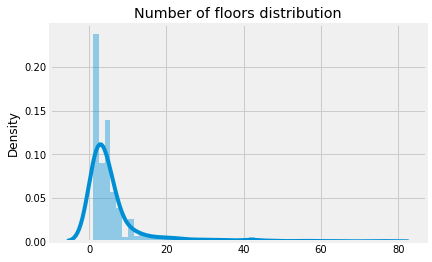

In [25]:
sns.distplot(x=data['numberoffloors'])
plt.title("Number of floors distribution")
plt.show()

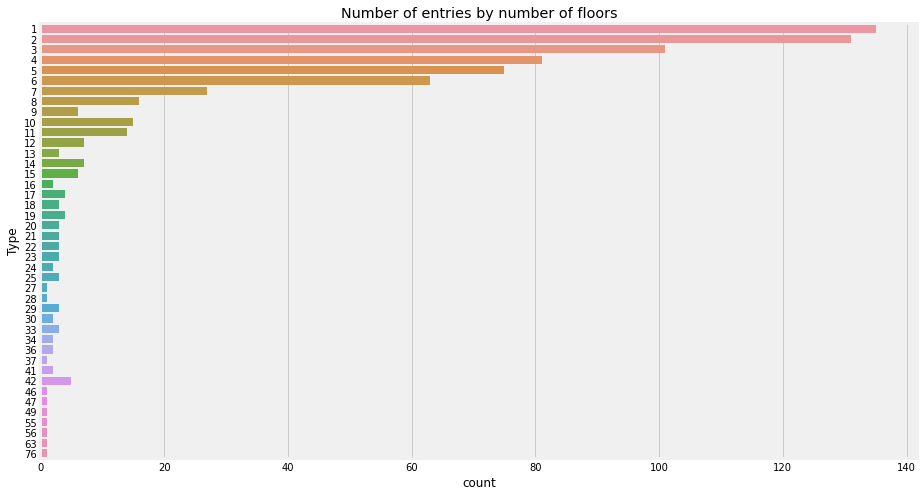

In [26]:
plt.figure(figsize=(14,8))
sns.countplot(y=data['numberoffloors'],data=data)
plt.title("Number of entries by number of floors")
plt.ylabel("Type")
plt.show()

Columbia Center = 76 floors

<Figure size 1008x576 with 0 Axes>

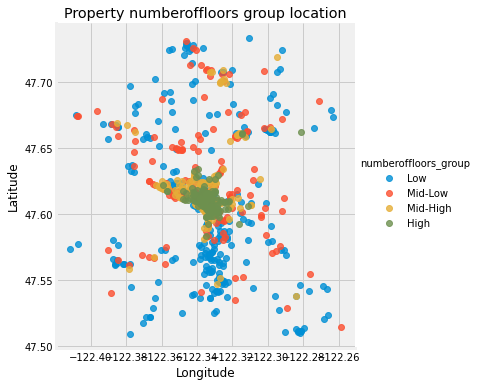

In [27]:
bin_labels_4 = ['Low', 'Mid-Low', 'Mid-High', 'High']
data["numberoffloors_group"] = pd.qcut(data["numberoffloors"],
                              q=4,
                              labels=bin_labels_4)
plt.figure(figsize=(14,8))
sns.lmplot(x="longitude", y = "latitude", hue = "numberoffloors_group", data=data, fit_reg=False)
plt.title("Property numberoffloors group location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

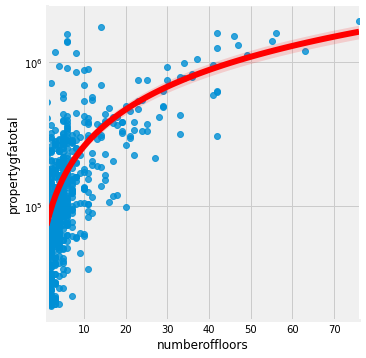

In [28]:
sns.lmplot(y='propertygfatotal', x ='numberoffloors', data=data,line_kws = {"color": "red"})
plt.yscale("log")
plt.show()

In [29]:
r = np.corrcoef(data.propertygfatotal, data.numberoffloors)
print(r[1,0])

0.7228951232202833


# total gfa

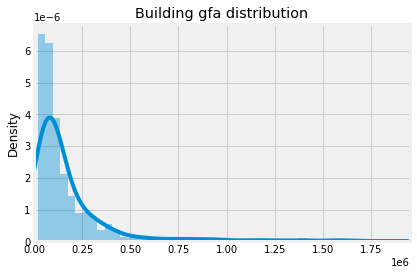

In [30]:
sns.distplot(x=data["propertygfatotal"])
plt.title("Building gfa distribution")
plt.xlim(0, max(data["propertygfatotal"]))
plt.show()

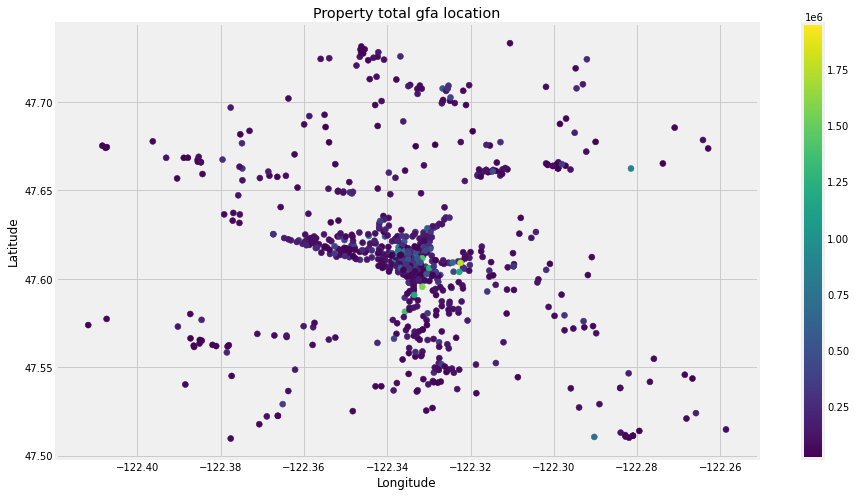

In [31]:
plt.figure(figsize=(14,8))
plt.scatter(x=data["longitude"], y = data["latitude"], c = data["propertygfatotal"])
plt.title("Property total gfa location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.colorbar()
plt.show()

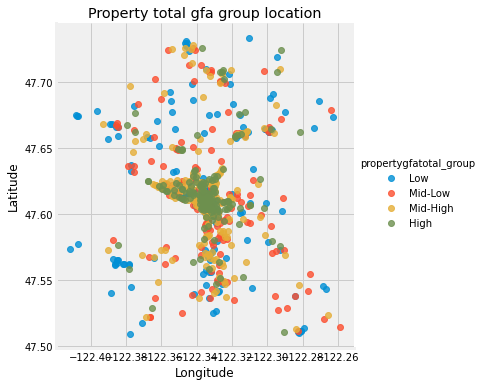

In [32]:
bin_labels_4 = ['Low', 'Mid-Low', 'Mid-High', 'High']
data["propertygfatotal_group"] = pd.qcut(data["propertygfatotal"],
                              q=4,
                              labels=bin_labels_4)

sns.lmplot(x="longitude", y = "latitude", hue = "propertygfatotal_group", data=data, fit_reg=False)
plt.title("Property total gfa group location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

<Figure size 1008x576 with 0 Axes>

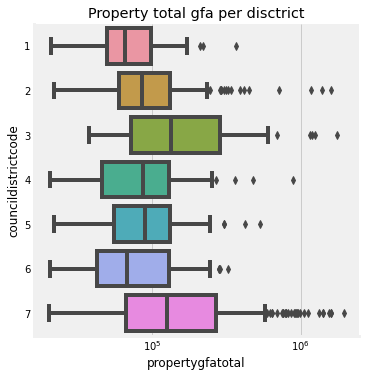

In [33]:
plt.figure(figsize=(14,8))
sns.catplot(x="propertygfatotal",y="councildistrictcode",data=data,kind="box")
plt.xscale("log")
plt.title("Property total gfa per disctrict")
plt.show()

In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('propertygfatotal ~ councildistrictcode', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
councildistrictcode,2.351812e+12,6.0,7.017752,2.816812e-07
Residual,4.127602e+13,739.0,NaN,NaN


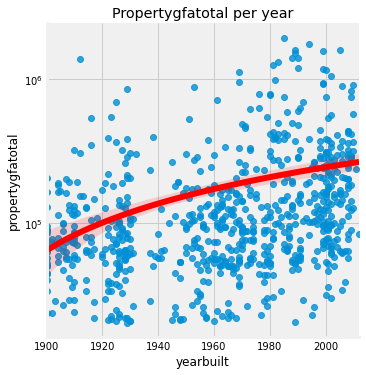

In [35]:
sns.lmplot(y='propertygfatotal', x ='yearbuilt', data=data,line_kws = {"color": "red"})
plt.yscale("log")
plt.title("Propertygfatotal per year")
plt.show()

# Building gfa

In [36]:
data["building_ratio"]= data.propertygfabuilding_s / data.propertygfatotal

In [37]:
data["building_ratio"].mean()

0.9065304622451182

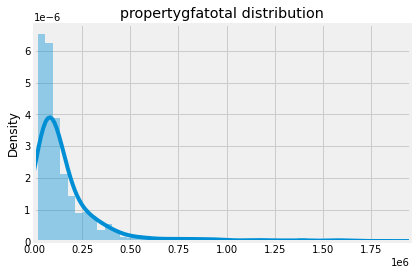

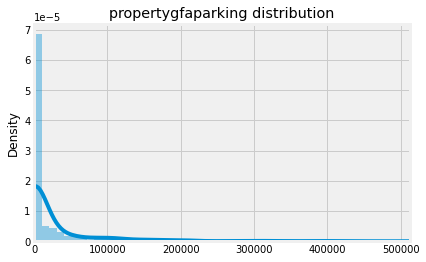

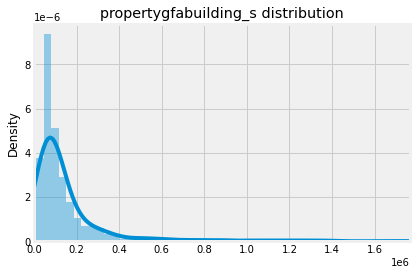

In [38]:
cols = ['propertygfatotal', 'propertygfaparking','propertygfabuilding_s']

for col in cols:
  sns.distplot(x=data[col])
  plt.title(str(col) + " distribution")
  plt.xlim(0, max(data[col]))
  plt.show()



# gfa per types

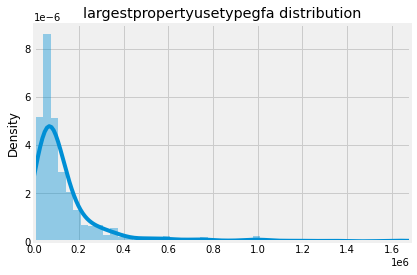

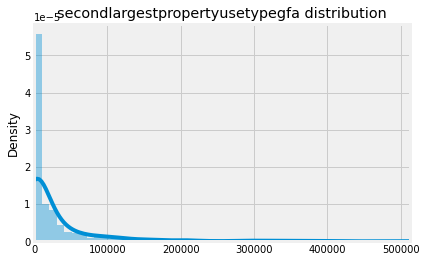

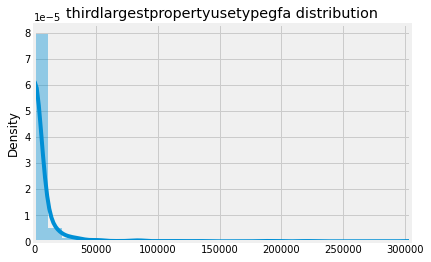

In [39]:
cols = ['largestpropertyusetypegfa','secondlargestpropertyusetypegfa',
       'thirdlargestpropertyusetypegfa']

for col in cols:
  sns.distplot(x=data[col])
  plt.title(str(col) + " distribution")
  plt.xlim(0, max(data[col]))
  plt.show()

# GHG Vs KBTU

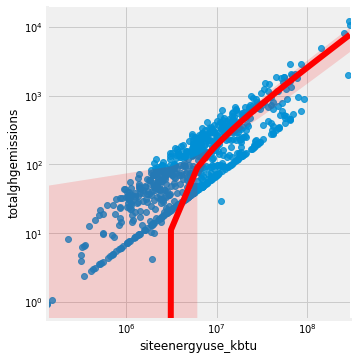

In [40]:
sns.lmplot(x='siteenergyuse_kbtu', y ='totalghgemissions', data=data,line_kws = {"color": "red"})
plt.yscale("log")
plt.xscale("log")
plt.show()

In [41]:
r = np.corrcoef(data.siteenergyuse_kbtu, data.totalghgemissions)
print(r[1,0])

0.8681208287596783


# kbtu

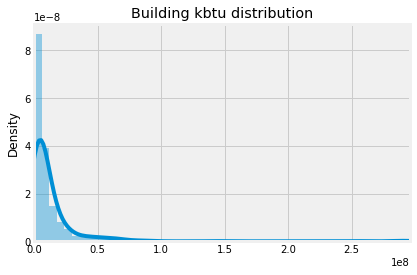

In [42]:
sns.distplot(x=data["siteenergyuse_kbtu"])
plt.title("Building kbtu distribution")
plt.xlim(0, max(data["siteenergyuse_kbtu"]))
plt.show()

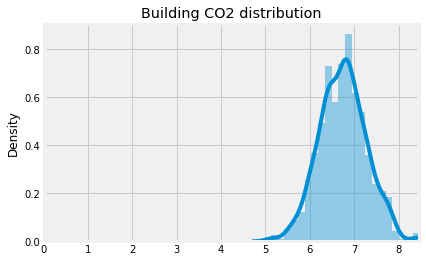

In [43]:
sns.distplot(x=np.log10(data["siteenergyuse_kbtu"]))
plt.title("Building CO2 distribution")
plt.xlim(0, max(np.log10(data["siteenergyuse_kbtu"])))
plt.show()

In [44]:
data.sort_values("siteenergyuse_kbtu", ascending=False)["primarypropertytype"].head(10)

734              Hospital
710              Hospital
566                 Other
72               Hospital
235              Hospital
58           Large Office
440                 Hotel
183    Mixed Use Property
17           Large Office
603                 Other
Name: primarypropertytype, dtype: object

In [45]:
data.sort_values("siteenergyuse_kbtu", ascending=False)[["primarypropertytype",	"propertyname","siteenergyuse_kbtu"]].head(10)

,primarypropertytype,propertyname,siteenergyuse_kbtu
734,Hospital,HARBORVIEW MEDICAL CENTER,295812640.0
710,Hospital,Swedish First Hill,291614432.0
566,Other,THE WESTIN BUILDING,284867168.0
72,Hospital,Seattle Children's Hospital Main Campus,253832464.0
235,Hospital,Swedish Cherry Hill,143423024.0
58,Large Office,Columbia Center - 2015,92937640.0
440,Hotel,SHERATON HOTEL,85357952.0
183,Mixed Use Property,FISHER PLAZA - WEST BUILDING,84980760.0
17,Large Office,STARBUCKS (SODO) CENTER,78272488.0
603,Other,WASHINGTON STATE CONVENTION CENTER,77164568.0


## Year

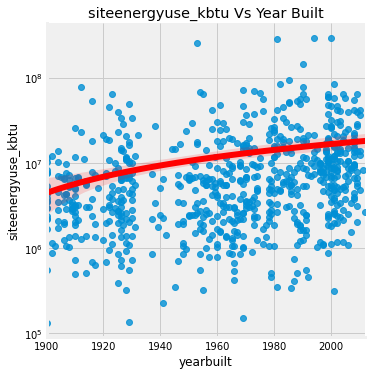

In [46]:
sns.lmplot(x="yearbuilt", y = "siteenergyuse_kbtu", data=data,line_kws = {"color": "red"})
plt.yscale("log")
plt.title("siteenergyuse_kbtu Vs Year Built")
plt.show()

In [47]:
r = np.corrcoef(data.siteenergyuse_kbtu, data.yearbuilt)
print(r[1,0])

0.16389658210775723


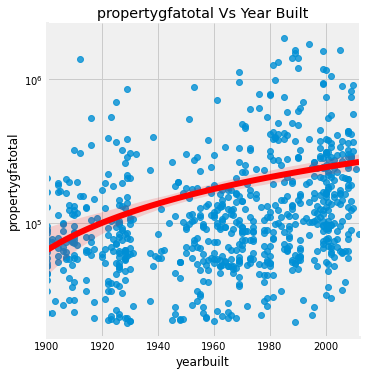

In [48]:
sns.lmplot(x="yearbuilt", y = "propertygfatotal", data=data,line_kws = {"color": "red"})
plt.yscale("log")
plt.title("propertygfatotal Vs Year Built")
plt.show()

## INTENSITY

In [49]:
data["intensity_kbtu"] = data["siteenergyuse_kbtu"]/data["propertygfatotal"]

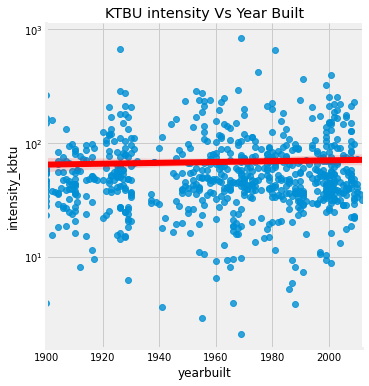

In [50]:
sns.lmplot(x="yearbuilt", y = "intensity_kbtu", data=data,line_kws = {"color": "red"})
plt.yscale("log")
plt.title("KTBU intensity Vs Year Built")
plt.show()

In [51]:
r = np.corrcoef(data.intensity_kbtu, data.yearbuilt)
print(round(r[1,0],2))

0.03


<Figure size 1008x576 with 0 Axes>

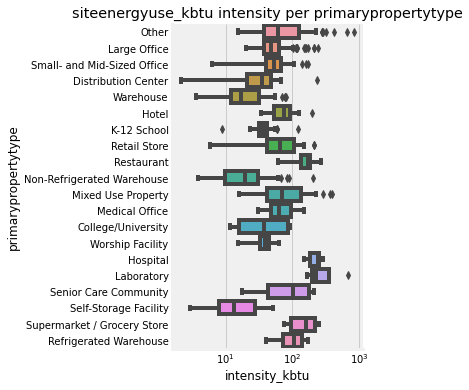

In [52]:
plt.figure(figsize=(14,8))
sns.catplot(x="intensity_kbtu",y="primarypropertytype",data=data,kind="box")
plt.title("siteenergyuse_kbtu intensity per primarypropertytype")
plt.xscale("log")
plt.show()

In [53]:
data.groupby("primarypropertytype")["intensity_kbtu"].median().sort_values(ascending = False)

primarypropertytype
Hospital                       239.333454
Laboratory                     228.706599
Restaurant                     168.270810
Supermarket / Grocery Store    159.733550
Refrigerated Warehouse         104.875267
Senior Care Community          103.317522
Hotel                           75.265756
Mixed Use Property              69.157236
Retail Store                    65.002242
Medical Office                  63.716613
Other                           59.714895
Small- and Mid-Sized Office     52.152914
Large Office                    47.511495
Worship Facility                38.432084
College/University              36.853697
K-12 School                     36.407837
Distribution Center             35.533741
Non-Refrigerated Warehouse      19.223955
Warehouse                       17.144543
Self-Storage Facility           13.436352
Name: intensity_kbtu, dtype: float64

In [54]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('intensity_kbtu ~ primarypropertytype', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
primarypropertytype,9.575025e+05,19.0,14.146067,1.877317e-38
Residual,2.586349e+06,726.0,NaN,NaN


<Figure size 1008x576 with 0 Axes>

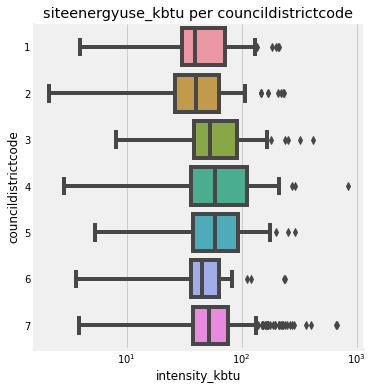

In [55]:
plt.figure(figsize=(14,8))
sns.catplot(x="intensity_kbtu",y="councildistrictcode",data=data,kind="box")
plt.title("siteenergyuse_kbtu per councildistrictcode")
plt.xscale("log")
plt.show()

In [56]:
model = ols('intensity_kbtu ~ councildistrictcode', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
councildistrictcode,9.370050e+04,6.0,3.345006,0.002938
Residual,3.450151e+06,739.0,NaN,NaN


In [57]:
corr_matrix["siteenergyuse_kbtu"].sort_values(ascending = False) 

siteenergyuse_kbtu                 1.000000
totalghgemissions                  0.868121
largestpropertyusetypegfa          0.677208
propertygfabuilding_s              0.673572
propertygfatotal                   0.642540
numberofbuildings                  0.424516
numberoffloors                     0.414516
secondlargestpropertyusetypegfa    0.317270
propertygfaparking                 0.249075
thirdlargestpropertyusetypegfa     0.176389
Name: siteenergyuse_kbtu, dtype: float64

## Building type

<Figure size 1008x576 with 0 Axes>

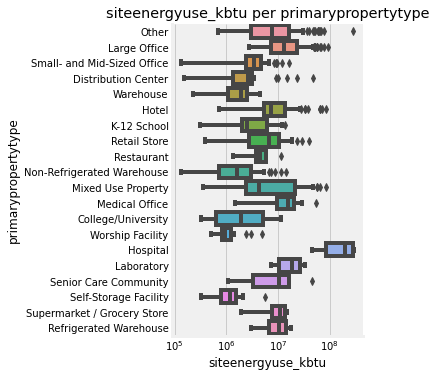

In [58]:
plt.figure(figsize=(14,8))
sns.catplot(x="siteenergyuse_kbtu",y="primarypropertytype",data=data,kind="box")
plt.title("siteenergyuse_kbtu per primarypropertytype")
plt.xscale("log")
plt.show()

In [59]:
data.groupby("primarypropertytype")["siteenergyuse_kbtu"].median().sort_values(ascending = False)

primarypropertytype
Hospital                       1.986277e+08
Laboratory                     1.844224e+07
Medical Office                 1.535417e+07
Large Office                   1.293100e+07
Supermarket / Grocery Store    1.085845e+07
Senior Care Community          1.062063e+07
Refrigerated Warehouse         1.036830e+07
Other                          7.580962e+06
Hotel                          7.339262e+06
Retail Store                   6.778694e+06
Restaurant                     4.470620e+06
Mixed Use Property             4.265815e+06
Small- and Mid-Sized Office    3.374396e+06
Distribution Center            2.582214e+06
K-12 School                    2.499140e+06
Warehouse                      1.969895e+06
College/University             1.895536e+06
Non-Refrigerated Warehouse     1.584384e+06
Self-Storage Facility          1.189158e+06
Worship Facility               9.554484e+05
Name: siteenergyuse_kbtu, dtype: float64

In [60]:
model = ols('siteenergyuse_kbtu ~ councildistrictcode', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
councildistrictcode,2.031583e+16,6.0,5.711639,0.000008
Residual,4.380936e+17,739.0,NaN,NaN


<Figure size 1008x576 with 0 Axes>

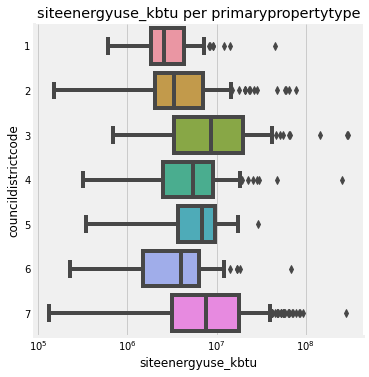

In [61]:
plt.figure(figsize=(14,8))
sns.catplot(x="siteenergyuse_kbtu",y="councildistrictcode",data=data,kind="box")
plt.title("siteenergyuse_kbtu per primarypropertytype")
plt.xscale("log")
plt.show()

In [62]:
data.groupby("councildistrictcode")["siteenergyuse_kbtu"].median().sort_values(ascending = False)

councildistrictcode
3    8631444.000
7    7535557.500
5    6787754.000
4    5439198.000
6    4017689.500
2    3335350.875
1    2581741.750
Name: siteenergyuse_kbtu, dtype: float64

In [63]:
model = ols('siteenergyuse_kbtu ~ councildistrictcode', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
councildistrictcode,2.031583e+16,6.0,5.711639,0.000008
Residual,4.380936e+17,739.0,NaN,NaN


## per use types

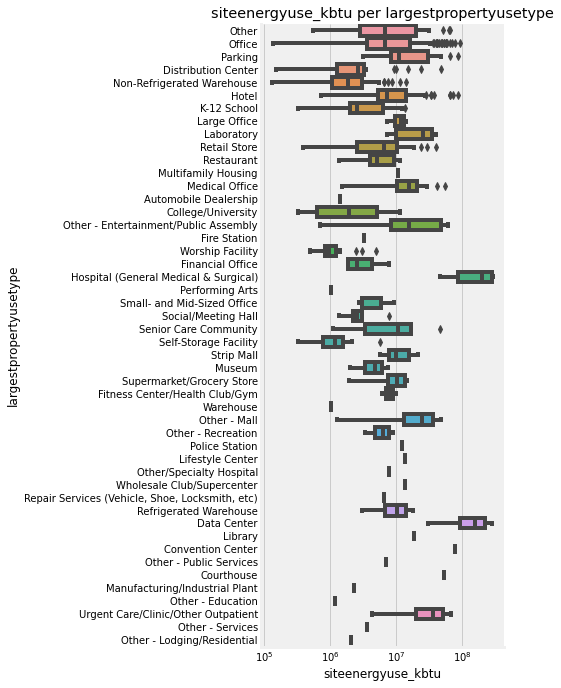

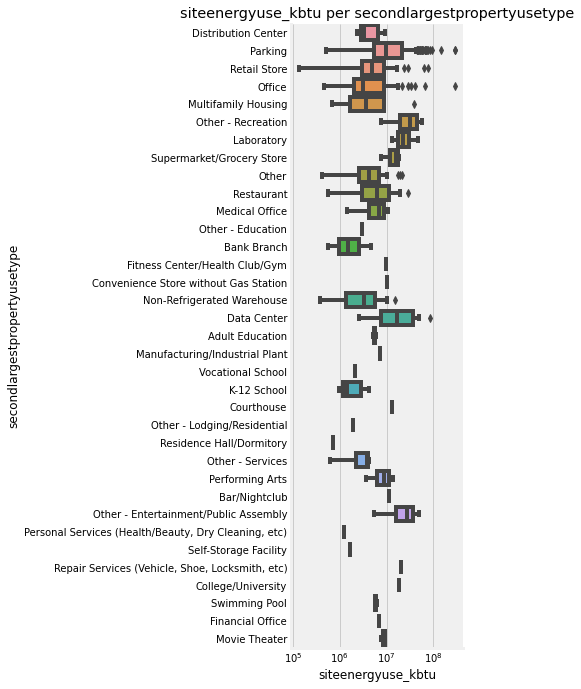

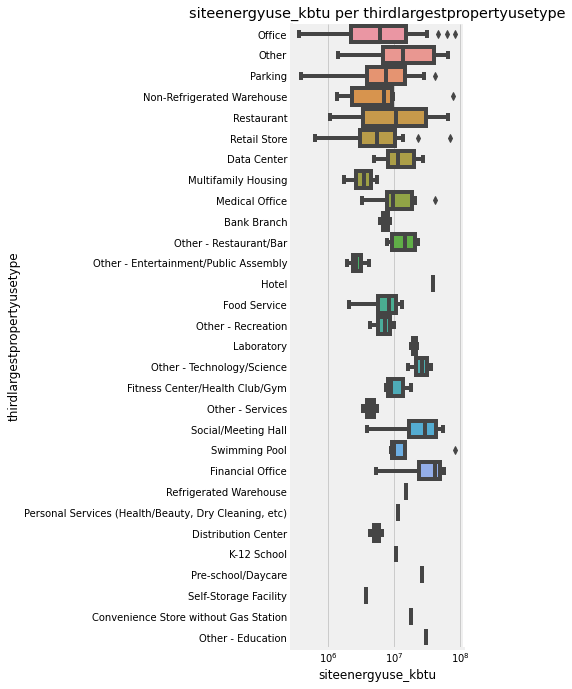

In [64]:
cols = ['largestpropertyusetype','secondlargestpropertyusetype',
       'thirdlargestpropertyusetype']
for col in cols:
  g = sns.catplot(x="siteenergyuse_kbtu",y=col,data=data,kind="box")
  plt.title("siteenergyuse_kbtu per " + str(col))
  plt.xscale("log")
  g.fig.set_figwidth(12)
  g.fig.set_figheight(10)

## nb of floor

<Figure size 1008x576 with 0 Axes>

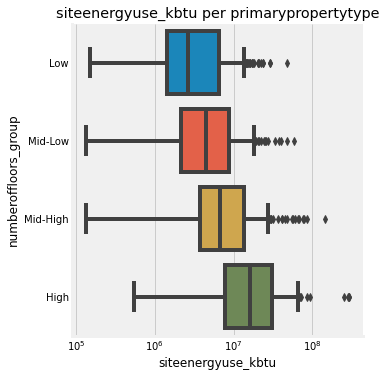

In [65]:
plt.figure(figsize=(14,8))
sns.catplot(x="siteenergyuse_kbtu",y='numberoffloors_group',data=data,kind="box")
plt.title("siteenergyuse_kbtu per primarypropertytype")
plt.xscale("log")
plt.show()

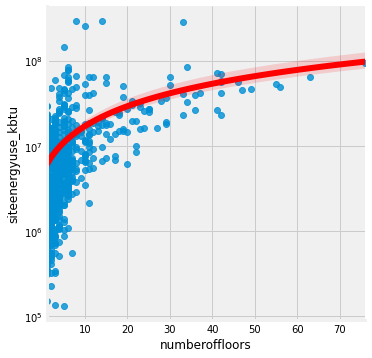

In [66]:
sns.lmplot(x="numberoffloors", y = "siteenergyuse_kbtu", data=data,line_kws = {"color": "red"})
plt.yscale("log")
plt.show()

In [67]:
r = np.corrcoef(data.siteenergyuse_kbtu, data.numberoffloors)
print(r[1,0])

0.4145160473238817


## Nb of Buildings

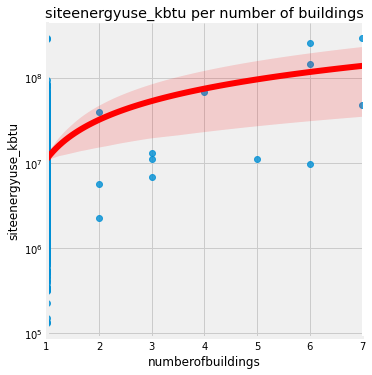

In [68]:
sns.lmplot(x="numberofbuildings", y = "siteenergyuse_kbtu", data=data,line_kws = {"color": "red"})
plt.yscale("log")
plt.title("siteenergyuse_kbtu per number of buildings")
plt.show()

## District

<Figure size 1008x576 with 0 Axes>

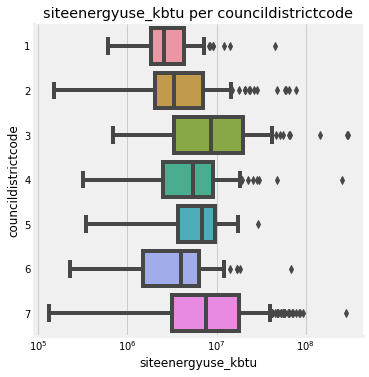

In [69]:
plt.figure(figsize=(14,8))
sns.catplot(x="siteenergyuse_kbtu",y="councildistrictcode",data=data,kind="box")
plt.title("siteenergyuse_kbtu per councildistrictcode")
plt.xscale("log")
plt.show()

# CO2

In [70]:
data.sort_values("totalghgemissions", ascending=False)["primarypropertytype"].head(10)

710    Hospital
734    Hospital
72     Hospital
235    Hospital
430       Hotel
440       Hotel
546       Hotel
552       Other
566       Other
567    Hospital
Name: primarypropertytype, dtype: object

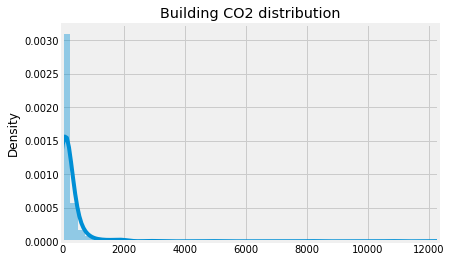

In [71]:

sns.distplot(x=data["totalghgemissions"])
plt.title("Building CO2 distribution")
plt.xlim(0, max(data["totalghgemissions"]))
plt.show()

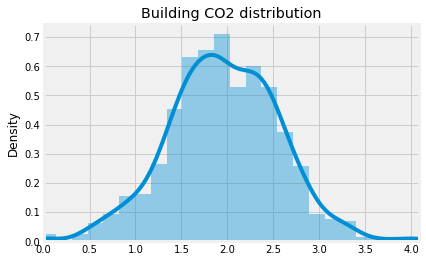

In [72]:
sns.distplot(x=np.log10(data["totalghgemissions"]))
plt.title("Building CO2 distribution")
plt.xlim(0, max(np.log10(data["totalghgemissions"])))
plt.show()

## Largest use gfa

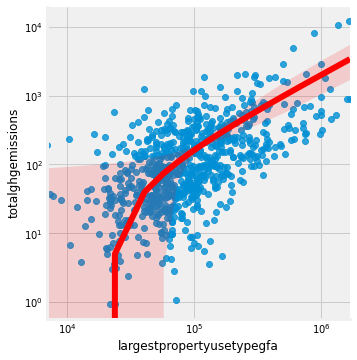

In [73]:
sns.lmplot(x="largestpropertyusetypegfa", y = "totalghgemissions", data=data,line_kws = {"color": "red"})
plt.yscale("log")
plt.xscale("log")
plt.show()

## building gfa

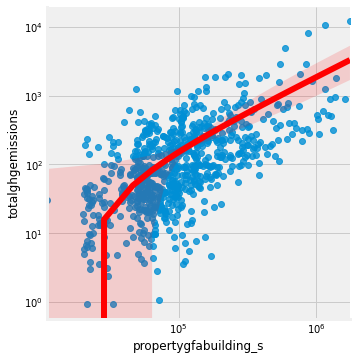

In [74]:
sns.lmplot(x="propertygfabuilding_s", y = "totalghgemissions", data=data,line_kws = {"color": "red"})
plt.yscale("log")
plt.xscale("log")
plt.show()

## total gfa

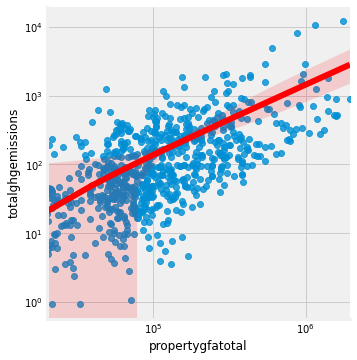

In [75]:
sns.lmplot(x="propertygfatotal", y = "totalghgemissions", data=data,line_kws = {"color": "red"})
plt.yscale("log")
plt.xscale("log")
plt.show()

## second gfa

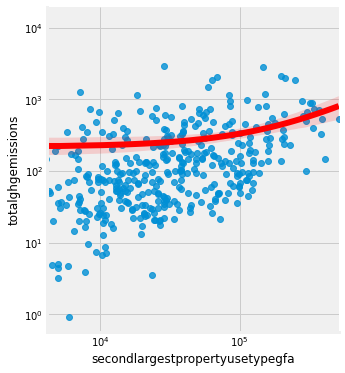

In [76]:
sns.lmplot(x="secondlargestpropertyusetypegfa", y = "totalghgemissions", data=data,line_kws = {"color": "red"})
plt.yscale("log")
plt.xscale("log")
plt.show()

## parking gfa

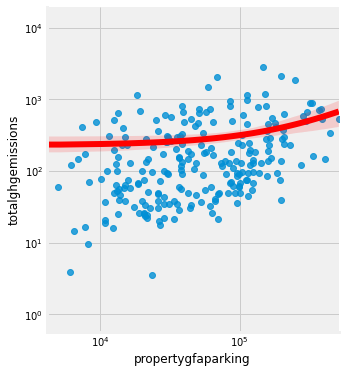

In [77]:
sns.lmplot(x="propertygfaparking", y = "totalghgemissions", data=data,line_kws = {"color": "red"})
plt.yscale("log")
plt.xscale("log")
plt.show()

## third gfa

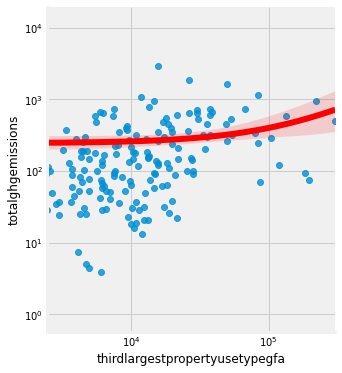

In [78]:
sns.lmplot(x="thirdlargestpropertyusetypegfa", y = "totalghgemissions", data=data,line_kws = {"color": "red"})
plt.yscale("log")
plt.xscale("log")
plt.show()

## yearbuilt

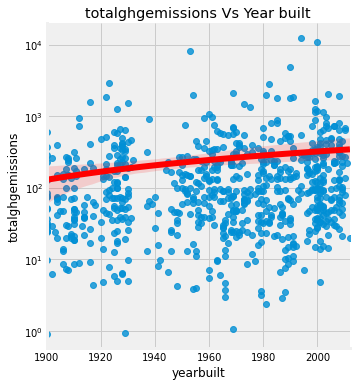

In [79]:
sns.lmplot(x="yearbuilt", y = "totalghgemissions", data=data,line_kws = {"color": "red"})
plt.yscale("log")
plt.title("totalghgemissions Vs Year built")
plt.show()

In [80]:
r = np.corrcoef(data.totalghgemissions, data.yearbuilt)
print(r[1,0])

0.08468942778331355


## INTENSITY

In [81]:
data["intensity_ghg"] = data["totalghgemissions"]/data["propertygfatotal"]

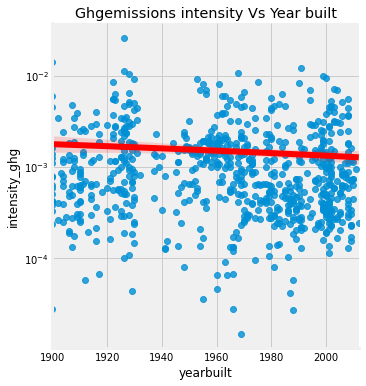

In [82]:
sns.lmplot(x="yearbuilt", y = "intensity_ghg", data=data,line_kws = {"color": "red"})
plt.yscale("log")
plt.title("Ghgemissions intensity Vs Year built")
plt.show()

In [83]:
r = np.corrcoef(data.intensity_ghg, data.yearbuilt)
print(round(r[1,0],2))

-0.07


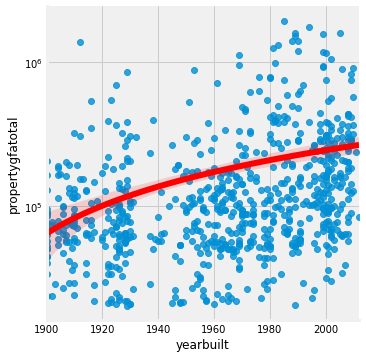

In [84]:
sns.lmplot(x="yearbuilt", y = "propertygfatotal", data=data,line_kws = {"color": "red"})
plt.yscale("log")
plt.show()

<Figure size 1008x576 with 0 Axes>

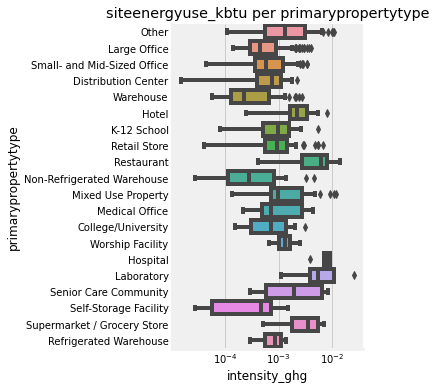

In [85]:
plt.figure(figsize=(14,8))
sns.catplot(x="intensity_ghg",y="primarypropertytype",data=data,kind="box")
plt.title("siteenergyuse_kbtu per primarypropertytype")
plt.xscale("log")
plt.show()

In [86]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('intensity_ghg ~ primarypropertytype', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
primarypropertytype,0.00101,19.0,19.683184,1.841715e-53
Residual,0.00196,726.0,NaN,NaN


<Figure size 1008x576 with 0 Axes>

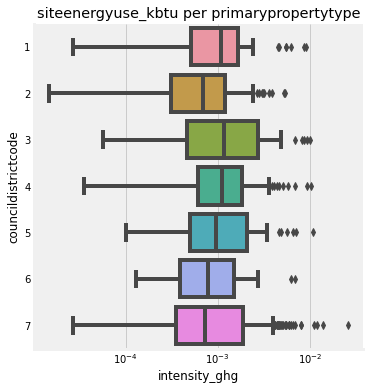

In [87]:
plt.figure(figsize=(14,8))
sns.catplot(x="intensity_ghg",y="councildistrictcode",data=data,kind="box")
plt.title("siteenergyuse_kbtu per primarypropertytype")
plt.xscale("log")
plt.show()

In [88]:
model = ols('intensity_ghg ~ councildistrictcode', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
councildistrictcode,0.000079,6.0,3.362347,0.002818
Residual,0.002891,739.0,NaN,NaN


## Building type

<Figure size 1008x576 with 0 Axes>

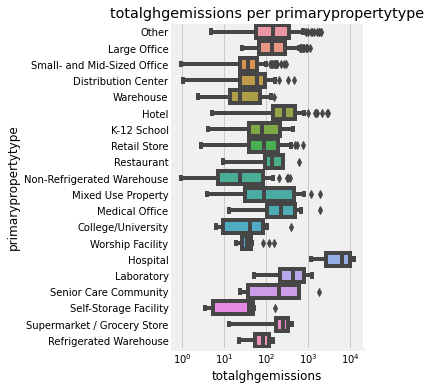

In [89]:
plt.figure(figsize=(14,8))
sns.catplot(x="totalghgemissions",y="primarypropertytype",data=data,kind="box")
plt.title("totalghgemissions per primarypropertytype")
plt.xscale("log")
plt.show()

In [90]:
data.groupby("primarypropertytype")["totalghgemissions"].median().sort_values(ascending = False)

primarypropertytype
Hospital                       6525.925
Laboratory                      441.275
Hotel                           259.660
Supermarket / Grocery Store     252.195
Medical Office                  230.615
Senior Care Community           197.300
Other                           148.000
Restaurant                      139.380
Large Office                    136.600
Retail Store                     89.470
Mixed Use Property               87.070
Refrigerated Warehouse           83.730
K-12 School                      80.080
Distribution Center              61.445
College/University               41.525
Self-Storage Facility            39.305
Small- and Mid-Sized Office      37.645
Worship Facility                 34.535
Non-Refrigerated Warehouse       24.340
Warehouse                        23.990
Name: totalghgemissions, dtype: float64

In [91]:
model = ols('totalghgemissions ~ primarypropertytype', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
primarypropertytype,2.530481e+08,19.0,56.912042,1.139411e-129
Residual,1.698955e+08,726.0,NaN,NaN


In [92]:
model = ols('totalghgemissions ~ councildistrictcode', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
councildistrictcode,1.768081e+07,6.0,5.373515,0.000019
Residual,4.052629e+08,739.0,NaN,NaN


## per use types

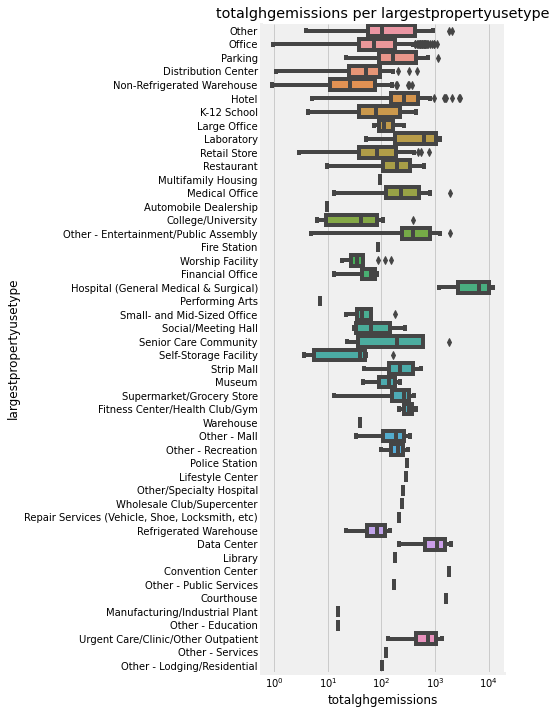

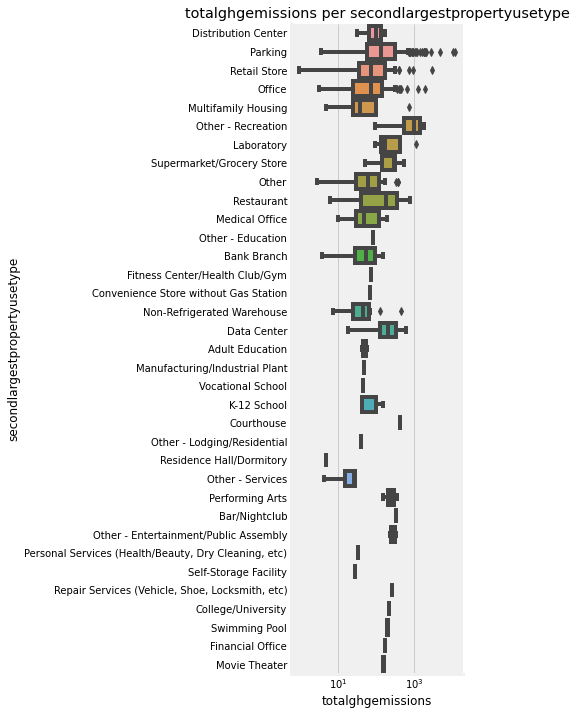

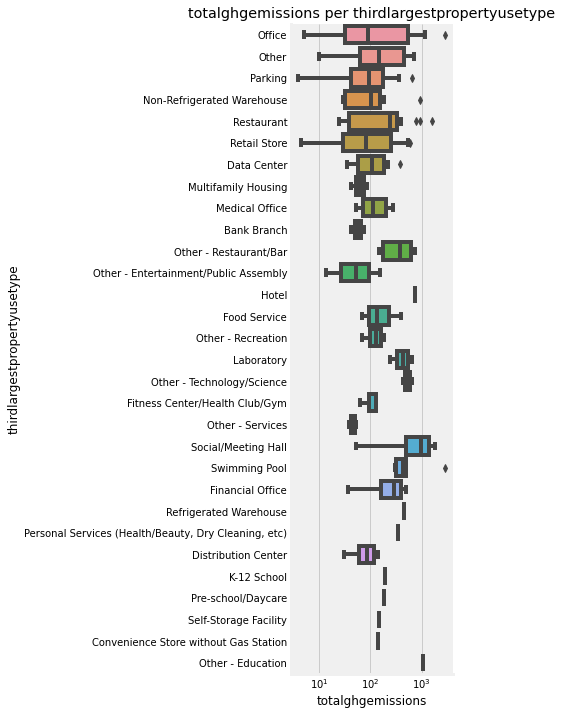

In [93]:
cols = ['largestpropertyusetype','secondlargestpropertyusetype',
       'thirdlargestpropertyusetype']
for col in cols:
  g = sns.catplot(x="totalghgemissions",y=col,data=data,kind="box")
  plt.title("totalghgemissions per " + str(col))
  plt.xscale("log")
  g.fig.set_figwidth(12)
  g.fig.set_figheight(10)

## District

<Figure size 1008x576 with 0 Axes>

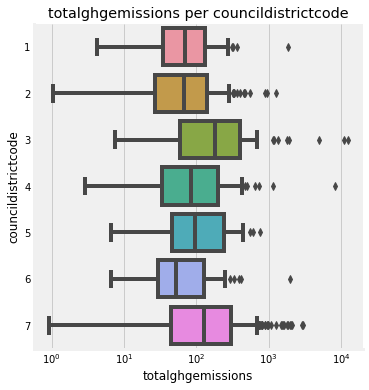

In [94]:
plt.figure(figsize=(14,8))
sns.catplot(x="totalghgemissions",y="councildistrictcode",data=data,kind="box")
plt.title("totalghgemissions per councildistrictcode")
plt.xscale("log")
plt.show()

In [95]:
data.groupby("councildistrictcode")["totalghgemissions"].median().sort_values(ascending = False)

councildistrictcode
3    178.500
7    128.110
5     95.120
4     84.850
1     69.420
2     66.805
6     51.595
Name: totalghgemissions, dtype: float64

In [96]:
model = ols('totalghgemissions ~ councildistrictcode', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
councildistrictcode,1.768081e+07,6.0,5.373515,0.000019
Residual,4.052629e+08,739.0,NaN,NaN


<Figure size 1008x576 with 0 Axes>

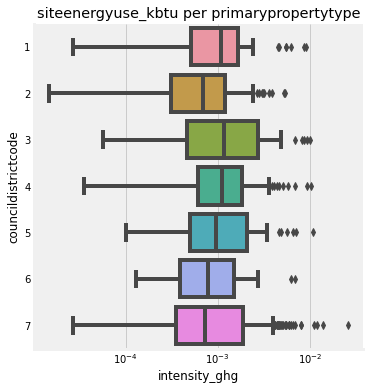

In [97]:
plt.figure(figsize=(14,8))
sns.catplot(x="intensity_ghg",y="councildistrictcode",data=data,kind="box")
plt.title("siteenergyuse_kbtu per primarypropertytype")
plt.xscale("log")
plt.show()

In [98]:
data.groupby("councildistrictcode")["intensity_ghg"].median().sort_values(ascending = False)

councildistrictcode
3    0.001174
4    0.001127
1    0.001074
5    0.000970
6    0.000786
7    0.000727
2    0.000701
Name: intensity_ghg, dtype: float64

In [99]:
model = ols('intensity_ghg ~ councildistrictcode', data=data).fit()
aov_table = sm.stats.anova_lm(model, typ=2)
aov_table

,sum_sq,df,F,PR(>F)
councildistrictcode,0.000079,6.0,3.362347,0.002818
Residual,0.002891,739.0,NaN,NaN


## nb of floor

<Figure size 1008x576 with 0 Axes>

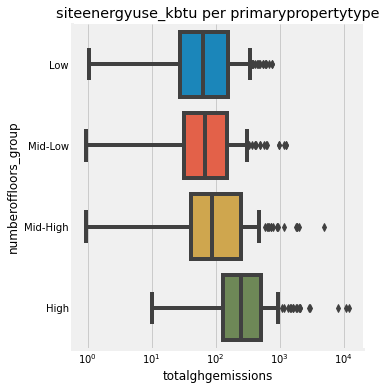

In [100]:
plt.figure(figsize=(14,8))
sns.catplot(x="totalghgemissions",y='numberoffloors_group',data=data,kind="box")
plt.title("siteenergyuse_kbtu per primarypropertytype")
plt.xscale("log")
plt.show()

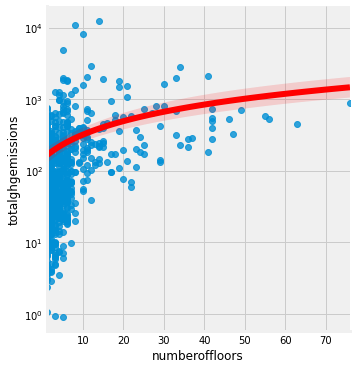

In [101]:
sns.lmplot(x="numberoffloors", y = "totalghgemissions", data=data,line_kws = {"color": "red"})
plt.yscale("log")
plt.show()

In [102]:
r = np.corrcoef(data.totalghgemissions, data.numberoffloors)
print(r[1,0])

0.19378679077901148


## Nb of Buildings

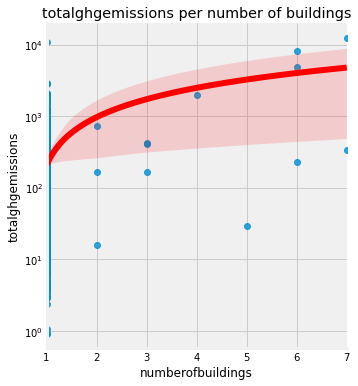

In [103]:
sns.lmplot(x="numberofbuildings", y = "totalghgemissions", data=data,line_kws = {"color": "red"})
plt.yscale("log")
plt.title("totalghgemissions per number of buildings")
plt.show()

## Localisation

In [104]:

fig, ax = plt.subplots(figsize=(10,10))

ax.scatter(x=data["longitude"], y = data["latitude"], 
           c = data["councildistrictcode"])
plt.title("Property type location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")

ax.plot([min(data["longitude"]), max(data["longitude"])],
        [min(data["latitude"]), max(data["latitude"])], alpha = 0)

mplleaflet.display(fig=fig)

# ENERGY STAR score

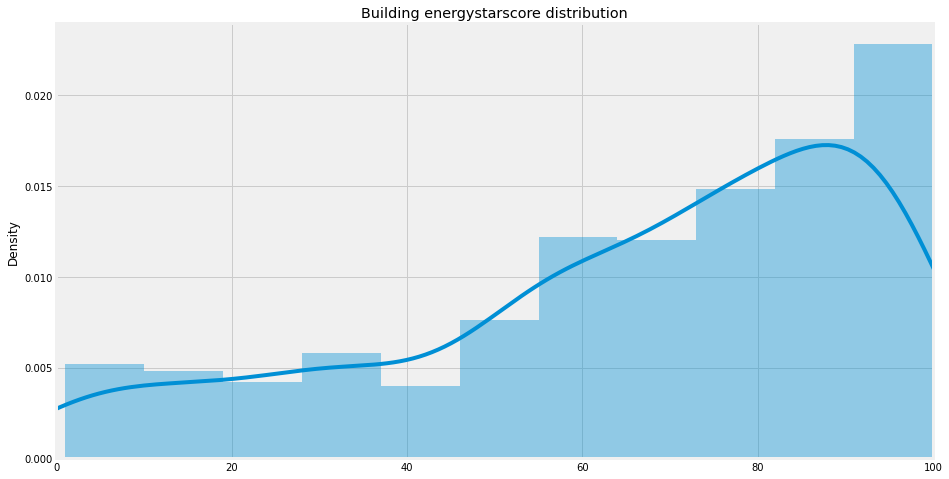

In [105]:
plt.figure(figsize=(14,8))
sns.distplot(x=data["energystarscore"].dropna())
plt.title("Building energystarscore distribution")
plt.xlim(0, max(data["energystarscore"].dropna()))
plt.show()

In [106]:
r = np.corrcoef(data.totalghgemissions, data.energystarscore)
print(r[1,0])

nan


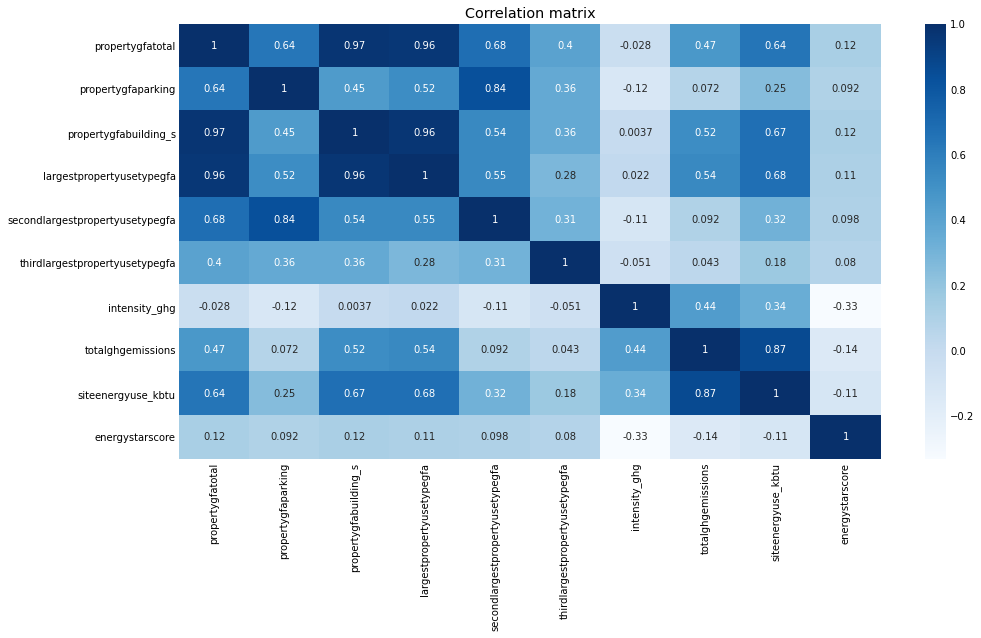

In [107]:
col = ['propertygfatotal', 'propertygfaparking','propertygfabuilding_s',
       'largestpropertyusetypegfa',
       'secondlargestpropertyusetypegfa',
       'thirdlargestpropertyusetypegfa',"intensity_ghg",
       'totalghgemissions', 'siteenergyuse_kbtu', "energystarscore"]

# correlation matrix


corr_matrix=data[col].corr()

plt.figure(figsize=(14,8))
sns.heatmap(corr_matrix,annot=True,cmap="Blues")
plt.title("Correlation matrix")
plt.show()

# TruncatedSVD

In [108]:
# converting type for cols of use in SVD

col = ['buildingtype', 'primarypropertytype','councildistrictcode',
        'largestpropertyusetype', 'secondlargestpropertyusetype',
       'thirdlargestpropertyusetype',"numberofbuildings","yearbuilt"
  ]


for column in col:
  data[column] = data[column].astype("category")

# selecting cols for SVD
data_svd = data[col]

# getting dummies
data_svd = pd.get_dummies(data_svd)
data_svd.head(5)

,buildingtype_NonResidential,buildingtype_Nonresidential COS,buildingtype_SPS-District K-12,primarypropertytype_College/University,primarypropertytype_Distribution Center,primarypropertytype_Hospital,primarypropertytype_Hotel,primarypropertytype_K-12 School,primarypropertytype_Laboratory,primarypropertytype_Large Office,primarypropertytype_Medical Office,primarypropertytype_Mixed Use Property,primarypropertytype_Non-Refrigerated Warehouse,primarypropertytype_Other,primarypropertytype_Refrigerated Warehouse,primarypropertytype_Restaurant,primarypropertytype_Retail Store,primarypropertytype_Self-Storage Facility,primarypropertytype_Senior Care Community,primarypropertytype_Small- and Mid-Sized Office,primarypropertytype_Supermarket / Grocery Store,primarypropertytype_Warehouse,primarypropertytype_Worship Facility,councildistrictcode_1,councildistrictcode_2,councildistrictcode_3,councildistrictcode_4,councildistrictcode_5,councildistrictcode_6,councildistrictcode_7,largestpropertyusetype_Automobile Dealership,largestpropertyusetype_College/University,largestpropertyusetype_Convention Center,largestpropertyusetype_Courthouse,largestpropertyusetype_Data Center,largestpropertyusetype_Distribution Center,largestpropertyusetype_Financial Office,largestpropertyusetype_Fire Station,largestpropertyusetype_Fitness Center/Health Club/Gym,largestpropertyusetype_Hospital (General Medical & Surgical),...,yearbuilt_1973,yearbuilt_1974,yearbuilt_1975,yearbuilt_1976,yearbuilt_1977,yearbuilt_1978,yearbuilt_1979,yearbuilt_1980,yearbuilt_1981,yearbuilt_1982,yearbuilt_1983,yearbuilt_1984,yearbuilt_1985,yearbuilt_1986,yearbuilt_1987,yearbuilt_1988,yearbuilt_1989,yearbuilt_1990,yearbuilt_1991,yearbuilt_1992,yearbuilt_1993,yearbuilt_1994,yearbuilt_1995,yearbuilt_1996,yearbuilt_1997,yearbuilt_1998,yearbuilt_1999,yearbuilt_2000,yearbuilt_2001,yearbuilt_2002,yearbuilt_2003,yearbuilt_2004,yearbuilt_2005,yearbuilt_2006,yearbuilt_2007,yearbuilt_2008,yearbuilt_2009,yearbuilt_2010,yearbuilt_2011,yearbuilt_2012
0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


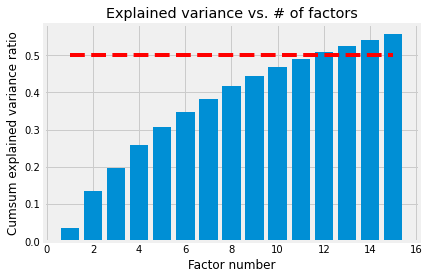

In [109]:
from sklearn.decomposition import TruncatedSVD

# computing SVD
n_comp = 15
svd = TruncatedSVD(n_components=n_comp)

# Fitting values
svd.fit(data_svd)

# Cumsum of variance explained
plt.bar(np.arange(1,n_comp+1),np.cumsum(svd.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.hlines(0.5,1,n_comp, linestyles="--", color = "r")
plt.show()

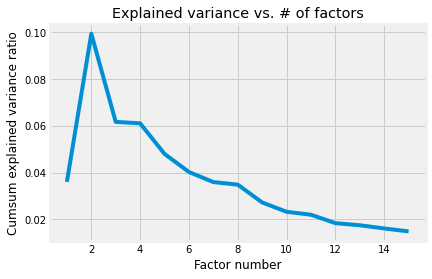

In [110]:
# Cumsum of variance explained
plt.plot(np.arange(1,n_comp+1),svd.explained_variance_ratio_)
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

In [111]:
# transform
X_trans = svd.transform(data_svd)

#prepraring for merge
X_trans = pd.DataFrame(X_trans)
X_trans = pd.DataFrame(X_trans,columns = X_trans.columns+1)
# adding prefix
X_trans = X_trans.add_prefix('SVD_')
X_trans.drop(['SVD_13', 'SVD_14', 'SVD_15'],
        inplace= True,
       axis = 1)

# merge
data = pd.concat([data, X_trans], axis = 1)

In [112]:
# selecting col for statify 

col = ['primarypropertytype','largestpropertyusetype', 
       'secondlargestpropertyusetype', 
       'thirdlargestpropertyusetype']
for c in col:
  l = len(data[c].unique())
  print("Unique type for", c, l)

Unique type for primarypropertytype 20
Unique type for largestpropertyusetype 48
Unique type for secondlargestpropertyusetype 36
Unique type for thirdlargestpropertyusetype 31


In [113]:
# selecting final features for modeling

col = ['primarypropertytype',
       'largestpropertyusetypegfa','numberoffloors', 'totalghgemissions',
       'siteenergyuse_kbtu', 'energystarscore', 'SVD_1', 'SVD_2',
       'SVD_3', 'SVD_4', 'SVD_5', 'SVD_6', 'SVD_7', 'SVD_8',
       'SVD_9', 'SVD_10', 'SVD_11', 'SVD_12']

data_model = data[col]

In [114]:
data_model.to_csv("/content/drive/My Drive/DATASETS/ML/P3/data_model.csv", index=False)